In [1]:
##### Resistivity inversion and converted to the water content #####

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert
from mpl_toolkits.axes_grid1 import make_axes_locatable


# For Jupyter notebooks, use the current working directory
try:
    # For regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For Jupyter notebooks
    current_dir = os.getcwd()
# Add the parent directory (OPEN_ERT) to the path
parent_dir = os.path.dirname(os.path.dirname(current_dir))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)


# Import the time-lapse inversion class
from watershed_geophysics.inversion.time_lapse import TimeLapseERTInversion
from watershed_geophysics.inversion.windowed import WindowedTimeLapseERTInversion

In [2]:



data_dir = "results/TL_measurements/appres"

# List of ERT data files testing monthly time-lapse inversion
ert_files = [
    "synthetic_data30.dat",
    "synthetic_data60.dat",
    "synthetic_data90.dat",
    "synthetic_data120.dat",
    "synthetic_data150.dat",
    "synthetic_data180.dat",
    "synthetic_data210.dat",
    "synthetic_data240.dat",
    "synthetic_data270.dat",
    "synthetic_data300.dat",
    "synthetic_data330.dat",
    "synthetic_data360.dat",
]


# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(os.path.join(data_dir, ert_files[0]))
ert_manager = ert.ERTManager(data)
mesh_with_interface = pg.load("results/Structure_WC/mesh_with_interface.bms")


In [73]:

# Set up inversion parameters
inversion_params = {
    "lambda_val": 10.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Define the window size (number of timesteps to process together)
window_size = 3  # A window size of 3 means each window includes 3 consecutive measurements

# Create the windowed time-lapse inversion object
inversion = WindowedTimeLapseERTInversion(
    data_dir=data_dir,               # Directory containing ERT data files
    ert_files=ert_files,             # List of ERT data filenames
    measurement_times=measurement_times,  # List of measurement times
    window_size=window_size,         # Size of sliding window
    mesh=mesh_with_interface,                       # Mesh for inversion
    **inversion_params               # Pass the same inversion parameters
)

# Run the inversion, optionally in parallel
print("Starting windowed time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")


Starting windowed time-lapse inversion...

Processing 10 windows sequentially...
Using L2 inversion

Starting L2 inversion for window 0


15/05/25 - 22:10:10 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 22:10:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:10:11 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 22:10:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:10:11 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 22:10:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:10:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:10:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:10:12 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 22:10:59 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:10:59 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:11:00 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
15/05/25 - 22:11:49 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:11:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:11:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2615.1518946820647
dPhi: 1.0
ERTphi_d: 6496037.306390248, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 40.160788922793834
dPhi: 0.9846430377507092
ERTphi_d: 99759.39968421988, ERTphi_m: 3674.857759567713, ERTphi_t: 1797.988416167088
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 18.440277474988452
dPhi: 0.5408387641378627
ERTphi_d: 45805.64924787132, ERTphi_m: 1383.0155406119065, ERTphi_t: 1655.5769272072848
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 7.594786193367898
dPhi: 0.5881414363927485
ERTphi_d: 18865.448904325858, ERTphi_m: 744.1260652506718, ERTphi_t: 1660.1108341055385
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3885995798470703
dPhi: 0.8171640985680866
ERTphi_d: 3449.281356340123, ERTphi_m: 668.724440142207, ERTphi_t: 1643.0760866679584
Convergence reached at iteration 4
End of inversion

Window 0 results:
Model shape: 

15/05/25 - 22:35:17 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 22:35:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:35:17 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 22:35:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:35:17 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 22:35:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:35:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:35:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:35:18 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 22:36:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:36:14 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:36:14 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
15/05/25 - 22:37:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:37:13 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:37:13 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2425.0555151750286
dPhi: 1.0
ERTphi_d: 6023837.899694771, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 35.23355072298689
dPhi: 0.9854710333423259
ERTphi_d: 87520.13999589944, ERTphi_m: 3271.0628847493426, ERTphi_t: 238.27003489011133
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 18.96926756375743
dPhi: 0.46161351397996914
ERTphi_d: 47119.66062837346, ERTphi_m: 1075.9021944788071, ERTphi_t: 216.81863546610884
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 7.129726384718223
dPhi: 0.6241432959520147
ERTphi_d: 17710.240339640066, ERTphi_m: 496.15680946498276, ERTphi_t: 201.4606670155365
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.2189333529138628
dPhi: 0.8290350446650363
ERTphi_d: 3027.8304486380353, ERTphi_m: 417.99316267459966, ERTphi_t: 197.07470142933005
Convergence reached at iteration 4
End of inversion

Window 1 results:
Model sha

15/05/25 - 23:03:43 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 23:03:43 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 23:03:43 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 23:03:43 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 23:03:43 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 23:03:43 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 23:03:44 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 23:03:44 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 23:03:44 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 23:04:33 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 23:04:33 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 23:04:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
15/05/25 - 23:05:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 23:05:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 23:05:21 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2361.5461075156036
dPhi: 1.0
ERTphi_d: 5866080.531068759, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 33.98178542623152
dPhi: 0.9856103654643521
ERTphi_d: 84410.75499875909, ERTphi_m: 3216.5436855608145, ERTphi_t: 302.0944605877054
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 19.275530994139725
dPhi: 0.43276873912397823
ERTphi_d: 47880.418989443075, ERTphi_m: 1038.9046616532032, ERTphi_t: 295.88178487565983
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 7.28934770242193
dPhi: 0.6218341427461539
ERTphi_d: 18106.739692816074, ERTphi_m: 506.8745667192552, ERTphi_t: 288.83746689285033
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3318392031249353
dPhi: 0.817289659171777
ERTphi_d: 3308.288580562339, ERTphi_m: 426.55262867178897, ERTphi_t: 279.9382848043143
Convergence reached at iteration 4
End of inversion

Window 2 results:
Model shape:

15/05/25 - 23:28:49 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 23:28:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 23:28:49 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 23:28:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 23:28:49 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 23:28:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 23:28:49 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 23:28:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 23:28:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 23:29:37 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 23:29:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 23:29:37 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
15/05/25 - 23:30:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 23:30:25 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 23:30:25 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2335.654820123236
dPhi: 1.0
ERTphi_d: 5801766.573186118, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 34.072106335811554
dPhi: 0.9854121824670935
ERTphi_d: 84635.1121381559, ERTphi_m: 3158.2372291290108, ERTphi_t: 280.4714842653169
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 19.80417956482062
dPhi: 0.41875681621698285
ERTphi_d: 49193.582039014414, ERTphi_m: 992.8364408058721, ERTphi_t: 271.7778213720504
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 7.854318943551102
dPhi: 0.6034009428240484
ERTphi_d: 19510.12825578094, ERTphi_m: 489.00176526151336, ERTphi_t: 261.7365791353285
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3459279263900472
dPhi: 0.8286384935392597
ERTphi_d: 3343.2849691528772, ERTphi_m: 398.3814031787634, ERTphi_t: 255.0236832136659
Convergence reached at iteration 4
End of inversion

Window 3 results:
Model shape: (4

15/05/25 - 23:53:16 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 23:53:16 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 23:53:16 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 23:53:16 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 23:53:16 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 23:53:16 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 23:53:16 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 23:53:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 23:53:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 23:54:02 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 23:54:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 23:54:02 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
15/05/25 - 23:54:45 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 23:54:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 23:54:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2119.7930626599455
dPhi: 1.0
ERTphi_d: 5265565.967647305, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 32.116872999552086
dPhi: 0.9848490526904304
ERTphi_d: 79778.31253088739, ERTphi_m: 3156.504744344071, ERTphi_t: 1979.4609117267964
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 19.727406649475906
dPhi: 0.38576191244549146
ERTphi_d: 49002.878117298154, ERTphi_m: 1085.4988248013829, ERTphi_t: 1861.177404937107
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 7.717360223545334
dPhi: 0.6088000637554476
ERTphi_d: 19169.92279528661, ERTphi_m: 664.5946033213255, ERTphi_t: 1825.5929957073386
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.5695676471501767
dPhi: 0.7966185843753291
ERTphi_d: 3898.806035521039, ERTphi_m: 566.6870657681536, ERTphi_t: 1794.8566057729158
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 1.174168

16/05/25 - 00:22:49 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 00:22:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 00:22:49 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 00:22:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 00:22:49 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 00:22:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 00:22:50 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 00:22:50 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 00:22:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


16/05/25 - 00:23:37 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 00:23:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 00:23:37 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
16/05/25 - 00:24:22 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 00:24:22 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 00:24:22 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 1950.9391985278994
dPhi: 1.0
ERTphi_d: 4846132.969143302, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 31.42860458322354
dPhi: 0.9838905258518881
ERTphi_d: 78068.65378472727, ERTphi_m: 3013.8639416609435, ERTphi_t: 1961.4819328013855
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 18.701788274574294
dPhi: 0.4049437280916623
ERTphi_d: 46455.242074042544, ERTphi_m: 1037.2193351733615, ERTphi_t: 1864.8322782368045
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 6.616064360798696
dPhi: 0.6462335973617317
ERTphi_d: 16434.30387222396, ERTphi_m: 620.7939022639996, ERTphi_t: 1858.9170623032192
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.475094610092337
dPhi: 0.7770434914701673
ERTphi_d: 3664.135011469365, ERTphi_m: 526.0497717285176, ERTphi_t: 1827.4425001840946
Convergence reached at iteration 4
End of inversion

Window 5 results:
Model shape:

16/05/25 - 00:47:00 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 00:47:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 00:47:00 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 00:47:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 00:47:00 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 00:47:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 00:47:01 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 00:47:01 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 00:47:01 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


16/05/25 - 00:47:48 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 00:47:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 00:47:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
16/05/25 - 00:48:34 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 00:48:34 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 00:48:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 1883.8677635907934
dPhi: 1.0
ERTphi_d: 4679527.524759531, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 34.71950958274177
dPhi: 0.9815700919917204
ERTphi_d: 86243.26180353056, ERTphi_m: 2898.2820143476474, ERTphi_t: 1341.1516829073616
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 18.151015464120935
dPhi: 0.4772099121715888
ERTphi_d: 45087.1224128764, ERTphi_m: 999.7071762041049, ERTphi_t: 1234.9985551612417
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 6.5540893706165795
dPhi: 0.6389133498579167
ERTphi_d: 16280.357996611583, ERTphi_m: 580.7618052663004, ERTphi_t: 1217.6481426640362
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3947692468867443
dPhi: 0.7871909935894679
ERTphi_d: 3464.606809266673, ERTphi_m: 488.5639491338447, ERTphi_t: 1192.3698818318417
Convergence reached at iteration 4
End of inversion

Window 6 results:
Model shape:

16/05/25 - 01:11:22 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 01:11:22 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 01:11:22 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 01:11:22 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 01:11:22 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 01:11:22 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 01:11:23 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 01:11:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 01:11:23 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


16/05/25 - 01:12:09 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 01:12:09 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 01:12:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
16/05/25 - 01:12:54 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 01:12:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 01:12:54 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2081.227373123059
dPhi: 1.0
ERTphi_d: 5169768.794837678, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 40.877534615137286
dPhi: 0.9803589289940017
ERTphi_d: 101539.79598400102, ERTphi_m: 3042.5469463147747, ERTphi_t: 1435.0336567910779
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 17.623227675453766
dPhi: 0.5688774325218786
ERTphi_d: 43776.09754582716, ERTphi_m: 1080.7809131539002, ERTphi_t: 1306.1707451426753
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 6.8426689085958845
dPhi: 0.6117244221881905
ERTphi_d: 16997.189568952177, ERTphi_m: 596.2364694391748, ERTphi_t: 1264.1242216836406
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3767432014365384
dPhi: 0.7988002605668896
ERTphi_d: 3419.8301123683614, ERTphi_m: 523.8838806006491, ERTphi_t: 1243.4715933665075
Convergence reached at iteration 4
End of inversion

Window 7 results:
Model sh

16/05/25 - 01:35:42 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 01:35:42 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 01:35:42 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 01:35:42 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 01:35:42 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 01:35:42 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 01:35:43 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 01:35:43 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 01:35:43 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


16/05/25 - 01:36:31 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 01:36:31 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 01:36:31 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
16/05/25 - 01:37:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 01:37:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 01:37:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2340.235065216368
dPhi: 1.0
ERTphi_d: 5813143.901997459, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 45.41574088268848
dPhi: 0.9805935132082598
ERTphi_d: 112812.70035259819, ERTphi_m: 3236.6902838607875, ERTphi_t: 663.9330270925484
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 18.256288523485864
dPhi: 0.5980184806267297
ERTphi_d: 45348.62069233889, ERTphi_m: 1157.3724782533582, ERTphi_t: 616.0230723297332
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 7.7680846902552405
dPhi: 0.5744981418177106
ERTphi_d: 19295.922370594017, ERTphi_m: 602.5896475081976, ERTphi_t: 622.5257195813788
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3588961513207065
dPhi: 0.8250667692867215
ERTphi_d: 3375.498039880635, ERTphi_m: 533.2936110305678, ERTphi_t: 611.1928635417348
Convergence reached at iteration 4
End of inversion

Window 8 results:
Model shape: (

16/05/25 - 02:00:03 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 02:00:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 02:00:03 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 02:00:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 02:00:03 - pyGIMLi - INFO - Found 3 regions.
16/05/25 - 02:00:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/25 - 02:00:04 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 02:00:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 02:00:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


16/05/25 - 02:00:50 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 02:00:50 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 02:00:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
16/05/25 - 02:01:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/25 - 02:01:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/25 - 02:01:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2547.60894011703
dPhi: 1.0
ERTphi_d: 6328260.6072507035, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 44.8895618765611
dPhi: 0.9823797282347035
ERTphi_d: 111505.67170137778, ERTphi_m: 3685.625115448293, ERTphi_t: 810.4408220294567
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 18.895185605611132
dPhi: 0.5790739580490943
ERTphi_d: 46935.64104433805, ERTphi_m: 1458.313567853644, ERTphi_t: 746.7432247692068
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 8.227105958260637
dPhi: 0.5645924771536773
ERTphi_d: 20436.13120031942, ERTphi_m: 823.4786277326594, ERTphi_t: 753.0100222437613
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3942787222214017
dPhi: 0.8305262227938804
ERTphi_d: 3463.3883459979616, ERTphi_m: 757.467593116477, ERTphi_t: 744.1509758250027
Convergence reached at iteration 4
End of inversion

Window 9 results:
Model shape: (4501,

In [74]:
result.final_models = np.array(result.final_models)
result.final_models.shape
result.all_coverage = np.array(result.all_coverage)
result.all_coverage.shape

(12, 4501)

In [75]:
np.save("results/Structure_WC/resmodel.npy", result.final_models[result.mesh.cellMarkers(),:])
np.save("results/Structure_WC/all_coverage.npy", result.all_coverage[:,result.mesh.cellMarkers()])
result.mesh.save("results/Structure_WC/mesh_res.bms")

1

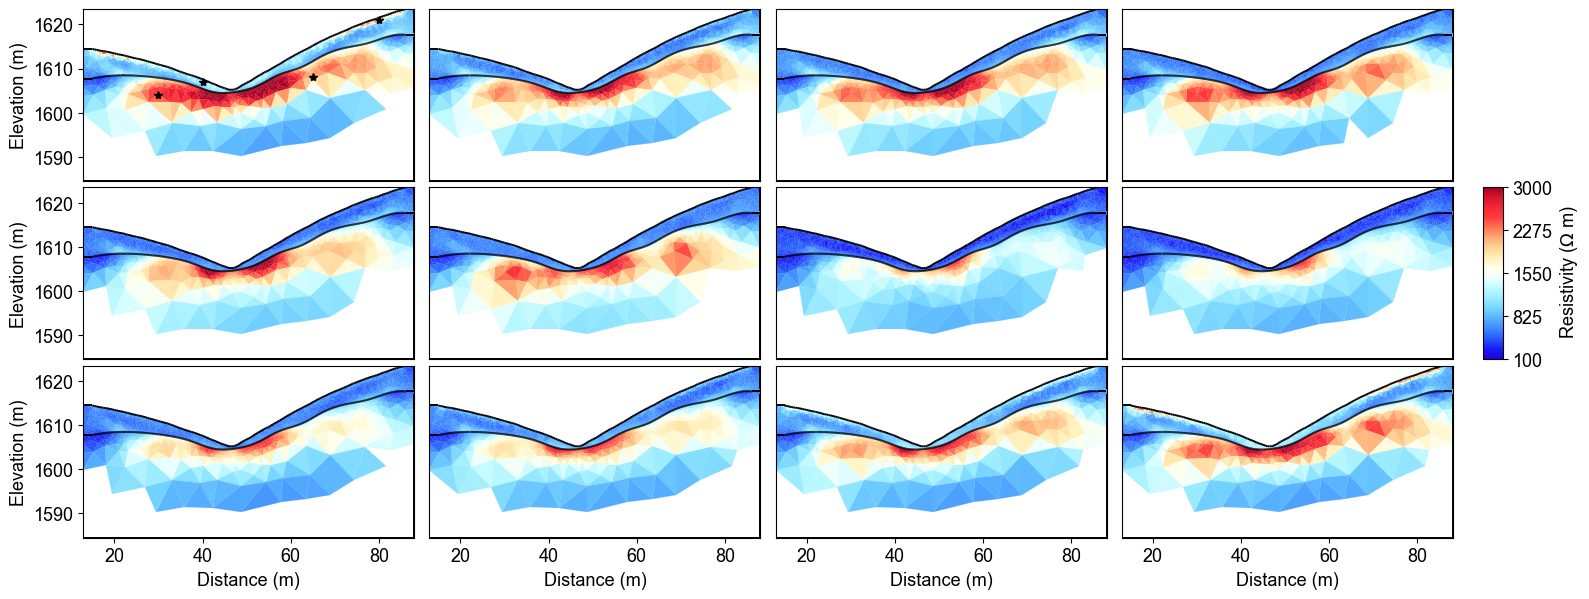

In [77]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
params = {'legend.fontsize': 13,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)
plt.rcParams["font.family"] = "Arial"

fixed_cmap = BlueDarkRed18_18.mpl_colormap
fig = plt.figure(figsize=[16, 6])

# Use tight_layout with adjusted parameters to reduce space
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# True resistivity model
for i in range(12):
    row, col = i // 4, i % 4
    ax = fig.add_subplot(3, 4, i+1)
    
    # Add common ylabel only to leftmost panels
    ylabel = "Elevation (m)" if col == 0 else None
    
    # Add resistivity label only to the middle-right panel (row 1, col 3)
    resistivity_label = ' Resistivity ($\Omega$ m)' if (i == 7) else None
    
    # Only show axis ticks on leftmost and bottom panels
    if col != 0:
        ax.set_yticks([])
    
    if row != 2:  # Not bottom row
        ax.set_xticks([])
    else:
        # Add "distance (m)" label to bottom row panels
        ax.set_xlabel("Distance (m)")
    
    # Create the plot
    ax, cbar = pg.show(result.mesh,
                      result.final_models[:,i][result.mesh.cellMarkers()],
                      pad=0.3,
                      orientation="vertical",
                      cMap=fixed_cmap,
                      cMin=100,
                      cMax=3000,
                      ylabel=ylabel,
                      label=resistivity_label,
                      ax=ax,
                      logScale=False,
                      coverage=result.all_coverage[i][result.mesh.cellMarkers()]>-1.2)
    if i ==0:
        ax.plot([40],[1607],'*',c='k')
        ax.plot([80],[1621],'*',c='k')

        ax.plot([30],[1604],'*',c='k')
        ax.plot([65],[1608],'*',c='k')
        
    # Only keep colorbar for the middle-right panel (row 1, col 3)
    # This corresponds to panel index 7 in a 0-based indexing system
    if i != 7:  # Keep only the colorbar for panel 7
        cbar.remove()

plt.tight_layout()
plt.savefig("results/Structure_WC/timelapse_ert_with structure.tiff", dpi=300, bbox_inches='tight')

15/05/25 - 15:22:48 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x24ee9569d50>)

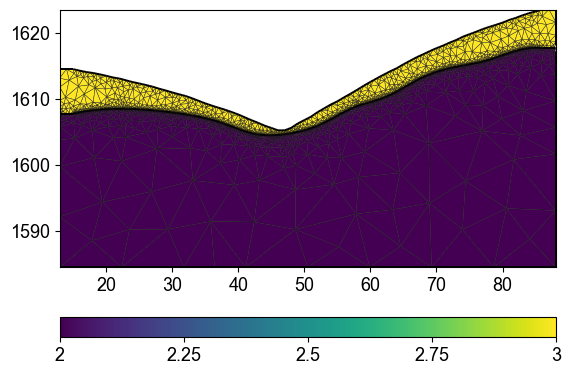

In [63]:
temp_marker = mesh_with_interface.cellMarkers()
index_marker = temp_marker[temp_marker != 1]
np.save("results/Structure_WC/index_marker.npy", index_marker)
pg.show(result.mesh,index_marker,cmap="viridis",clim=(0,1e4),showMesh=True)

In [37]:
result.final_models.shape

(4501, 12)

In [38]:
result.mesh.cellMarkers()

4501 [0,...,2180]

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pygimli as pg

# Import the resistivity_to_saturation function from your module
from watershed_geophysics.petrophysics.resistivity_models import resistivity_to_saturation

# Extract the inverted resistivity values
resistivity_values = result.final_models[result.mesh.cellMarkers(),:]

# Extract cell markers from the mesh (to identify different geological layers)
cell_markers = index_marker.copy()

# Define different parameters for each layer
# Layer 1 parameters (top layer - marker 2)
layer1_params = {
    'rhos': 100.0,     # Saturated resistivity (ohm-m)
    'n': 2.2,          # Saturation exponent
    'sigma_sur': 1/500  # Surface conductivity (S/m)
}

# Layer 2 parameters (bottom layer - marker 3)
layer2_params = {
    'rhos': 500.0,     # Saturated resistivity (ohm-m)
    'n': 1.8,          # Saturation exponent
    'sigma_sur': 0 # Surface conductivity (S/m)
}

# Define porosity values for each cell based on layer
porosity = np.zeros_like(cell_markers, dtype=float)
porosity[cell_markers == 2] = 0.30  # Top layer porosity
porosity[cell_markers == 3] = 0.25  # Bottom layer porosity

# Create arrays to store water content and saturation results
water_content = np.zeros_like(resistivity_values)
saturation = np.zeros_like(resistivity_values)

# Process each timestep
for t in range(resistivity_values.shape[1]):
    # Extract resistivity for this timestep
    resistivity_t = resistivity_values[:, t]
    
    # Process each layer separately
    # Layer 1 (marker 2)
    mask_layer1 = cell_markers == 2
    if np.any(mask_layer1):
        saturation[mask_layer1, t] = resistivity_to_saturation(
            resistivity_t[mask_layer1],
            layer1_params['rhos'],
            layer1_params['n'],
            layer1_params['sigma_sur']
        )
    
    # Layer 2 (marker 3)
    mask_layer2 = cell_markers == 3
    if np.any(mask_layer2):
        saturation[mask_layer2, t] = resistivity_to_saturation(
            resistivity_t[mask_layer2],
            layer2_params['rhos'],
            layer2_params['n'],
            layer2_params['sigma_sur']
        )
    
    # Convert saturation to water content (water_content = saturation * porosity)
    water_content[:, t] = saturation[:, t] * porosity



In [65]:
np.min((resistivity_t[mask_layer2]/500.0) ** (-1.8))

0.07359492667409659

In [68]:
np.max((resistivity_t[mask_layer2]/500.0) ** (-1.8))

0.8842405514107625

In [67]:
saturation[mask_layer2, 11]

array([0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01])

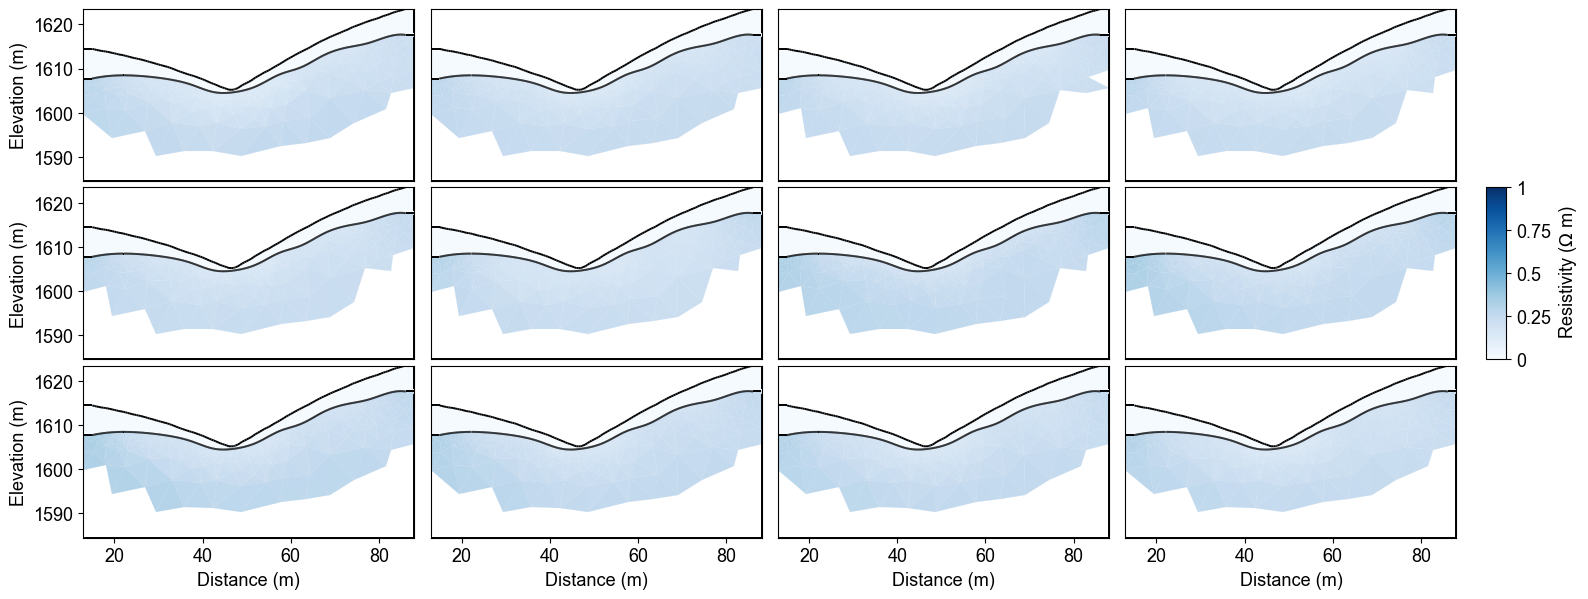

In [46]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
params = {'legend.fontsize': 13,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)
plt.rcParams["font.family"] = "Arial"

fixed_cmap = BlueDarkRed18_18.mpl_colormap
fig = plt.figure(figsize=[16, 6])

# Use tight_layout with adjusted parameters to reduce space
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# True resistivity model
for i in range(12):
    row, col = i // 4, i % 4
    ax = fig.add_subplot(3, 4, i+1)
    
    # Add common ylabel only to leftmost panels
    ylabel = "Elevation (m)" if col == 0 else None
    
    # Add resistivity label only to the middle-right panel (row 1, col 3)
    resistivity_label = ' Resistivity ($\Omega$ m)' if (i == 7) else None
    
    # Only show axis ticks on leftmost and bottom panels
    if col != 0:
        ax.set_yticks([])
    
    if row != 2:  # Not bottom row
        ax.set_xticks([])
    else:
        # Add "distance (m)" label to bottom row panels
        ax.set_xlabel("Distance (m)")
    
    # Create the plot
    ax, cbar = pg.show(result.mesh,
                      saturation[:, i],
                      pad=0.3,
                      orientation="vertical",
                      cMap='Blues',
                      cMin=0,
                      cMax=1,
                      ylabel=ylabel,
                      label=resistivity_label,
                      ax=ax,
                      logScale=False,
                      coverage=result.all_coverage[i][result.mesh.cellMarkers()]>-1.2)
    
    # Only keep colorbar for the middle-right panel (row 1, col 3)
    # This corresponds to panel index 7 in a 0-based indexing system
    if i != 7:  # Keep only the colorbar for panel 7
        cbar.remove()

plt.tight_layout()
plt.savefig("results/TL_measurements/appres/timelapse_sat.tiff", dpi=300, bbox_inches='tight')

In [ ]:

# Create a time-series plot to show water content changes over time
def extract_time_series(mesh, values, x_positions):
    """Extract time series at specific x positions"""
    time_series = []
    for x_pos in x_positions:
        # Find closest cell to this position
        cell_idx = np.argmin(np.abs(mesh.cellCenters()[:, 0] - x_pos))
        time_series.append(values[cell_idx, :])
    return time_series

# Define positions to sample (adjust based on your model dimensions)
x_positions = [20, 40, 60, 80]
time_series = extract_time_series(mesh_with_interface, water_content, x_positions)

# Plot time series
plt.figure(figsize=(10, 6))
for i, x_pos in enumerate(x_positions):
    plt.plot(measurement_times, time_series[i], 'o-', label=f'x={x_pos}m')
plt.xlabel('Time (days)')
plt.ylabel('Water Content')
plt.title('Water Content Time Series at Selected Locations')
plt.legend()
plt.grid(True)
plt.tight_layout()
